In [1]:
#import 
import glob
import re
import spacy 
from bs4 import BeautifulSoup
import json
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def lirefich(chemin): 
    '''cette fonction permet de lire un fichier txt, output: string''' 
    with open(chemin , "r", encoding = "utf−8") as f:
        chaine = f.read()
    return chaine

def tokenisation(chaine):
    ''' decouper une chaine de caractere en mot pour des txt en alphabet latin'''
    liste_mots = re.findall(r"[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", chaine.lower())  
    return liste_mots
    
def tokenisation_spacy(txt_spacy):
    ''' cette fonction réalise une tokenisation avec l'outil spacy '''
    token=[]
    for mot in txt_spacy:
        token.append(mot.text)
    return token

def ecrire_json(chemin, contenu):
    with open(chemin , "w", encoding = "utf−8") as f:
        json.dump(contenu,f, indent=2,ensure_ascii=False)

def dico_effec(liste_mots):
    '''input: liste de mot, output:donne un dico {mot:effec_relative...}'''
    compt_mots = Counter()
    compt_mots.update(liste_mots)  #maj frequence
    return compt_mots

def lire_json(chemin):
    with open(chemin , "r", encoding = "utf−8") as f:
        file_j=json.load(f)
    return file_j

def enlever_nombre(texte):
    texte_sans_nombres = re.sub(r'\d+', '', texte)
    return texte_sans_nombres

def update_vocabulaire (mots , vocabulaire ):
    dejavu = vocabulaire.intersection (mots)
    nouveau = mots.difference( vocabulaire )
    for x in mots :
        vocabulaire .add(x)
    return vocabulaire , dejavu , nouveau

In [5]:
nlp= spacy.load("fr_core_news_sm")
#TOKENISATION


path_19es= "ELTeC-fr/T1/*"
path_20es= "ELTeC-fr/T2/*"

for chem in glob.glob(path_19es):
    xml19= lirefich(chem)
    soup = BeautifulSoup ( xml19, "xml")
    for cpt_txt , d in enumerate(soup.find_all ("div", type="chapter")):
        texte19 = d.text
token_simple19= texte19.split()
token_avance19= tokenisation(texte19)
token_spacy19= tokenisation_spacy(nlp(texte19))


mot_different1= set(token_simple19).difference(set(token_avance19))
mot_different2= set(token_simple19).difference(set(token_spacy19))
mot_commun1=set(token_simple19).intersection(set(token_avance19))
mot_commun2= set(token_simple19).intersection(set(token_spacy19))
mot_different3 = set(token_avance19).difference(set(token_simple19))
mot_different4 = set(token_spacy19).difference(set(token_simple19))


print("Différence entre tokenisation simple et avancée :",mot_different1, "ce set contient", len(mot_different1),"mots")
print("-"*20)
print("Différence entre tokenisation simple et SpaCy :",mot_different2, "ce set contient", len(mot_different2),"mots") 
print("-"*20)
print("Similarité entre tokenisation simple et avancée :",mot_commun1, "ce set contient", len(mot_commun1),"mots")
print("-"*20)
print("Similarité entre tokenisation simple et SpaCy :",mot_commun2, "ce set contient", len(mot_commun2),"mots")

print("-" * 20)
print("Mots présents uniquement dans la tokenisation simple (par rapport à la tokenisation avancée) :")
print(mot_different1)
print(f"Nombre de mots uniques : {len(mot_different1)}")
print("-" * 20)

print("Mots présents uniquement dans la tokenisation simple (par rapport à SpaCy) :")
print(mot_different2)
print(f"Nombre de mots uniques : {len(mot_different2)}")
print("-" * 20)

print("Mots présents uniquement dans la tokenisation avancée (et pas dans la simple) :")
print(mot_different3)
print(f"Nombre de mots uniques : {len(mot_different3)}")
print("-" * 20)

print("Mots présents uniquement dans la tokenisation SpaCy (et pas dans la simple) :")
print(mot_different4)
print(f"Nombre de mots uniques : {len(mot_different4)}")
print("-" * 20)

Différence entre tokenisation simple et avancée : {'adorateur,', 'dépit,', 'Angleterre,', 'Seldorf', 'Les', 'roman,', 'Adolphe,', 'Cela', "d'Adolphe,", 'Menneraye', 'envoyés.', 'raconte.', "qu'en", 'elle,', 'choisit,', ':', "d'un", 'jeune,', "qu'Ellénore", 'flattant,', 'histoire.', 'sincères.', 'jolie.', 'Menneraye,', 'époux.', "l'amitié", 'généreux,', "d'une", 'Dans', 'existence.', 'aimée,', 'Ses', 'amour,', 'Mais', 'Ellénore', 'amour.', 'Frédérick', 'reconnaître,', "qu'il", 'CONCLUSION', 'M.', 'lui,', 'maison,', "l'esprit"} ce set contient 44 mots
--------------------
Différence entre tokenisation simple et SpaCy : {'adorateur,', 'dépit,', 'Angleterre,', 'Adolphe,', 'roman,', "d'Adolphe,", 'envoyés.', 'raconte.', "qu'en", 'elle,', 'choisit,', "d'un", 'jeune,', 'très-honorable', "qu'Ellénore", 'flattant,', 'histoire.', 'sincères.', 'jolie.', 'Menneraye,', 'époux.', "l'amitié", 'généreux,', "d'une", 'existence.', 'aimée,', 'amour,', 'amour.', 'reconnaître,', "qu'il", 'lui,', 'maison,',

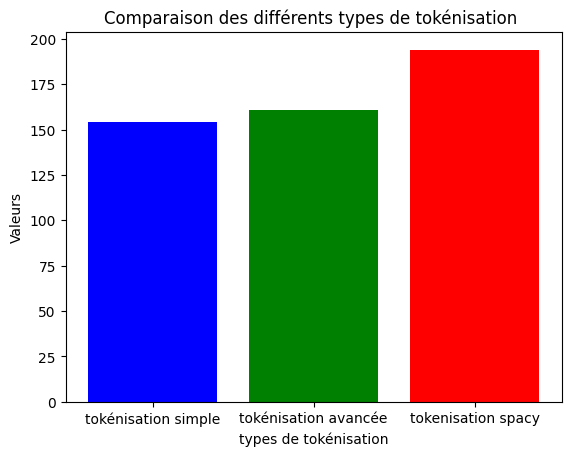

In [9]:
valeurs = [154, 161, 194]
noms = ["tokénisation simple", 'tokénisation avancée', 'tokenisation spacy'] 

plt.bar(noms, valeurs, color=['blue', 'green', 'red'])


plt.xlabel("types de tokénisation")
plt.ylabel("Valeurs")
plt.title("Comparaison des différents types de tokénisation ")

plt.savefig("comparaison_methode_token")
plt.show()

In [7]:
#Création d'un vocabulaire avec T1

path_T1= "ELTeC-fr/T1/*"
dic_T1_vocab = {}
for path_fichier in glob.glob(path_T1) :
    #print(path_fichier)
    xml_doc = lirefich(path_fichier)
    soup = BeautifulSoup(xml_doc, 'xml')

    for cpt, d in enumerate(soup.find_all("div", type ="chapter")):
        texte = d.text
        #print(texte[:20])
        liste_mots = texte.split()
        #print(liste_mots[:10])
        dic_T1_vocab= dico_effec(liste_mots)
             
#print(dic_T1_vocab)
ecrire_json("./frequence_mots_T1.json",dic_T1_vocab)
set_mots_T1 = list(set(dic_T1_vocab.keys()))

print("Taille T1 Vocab : %i types"%len(set_mots_T1))
ecrire_json("./vocabulaire_T1_%s.json"%cpt, set_mots_T1)

Taille T1 Vocab : 121 types


3.2 Utiliser le Glaff : Un Gros Lexique à tout Faire du Français

In [8]:


with open("GLAFF-1.2.2/glaff-1.2.2.txt", encoding = "utf-8") as f :
    ligne = f.readline()
    cpt = 0
    dic_glaff = {}
    while len(ligne) > 0 :
        cpt += 1
        elems = re.split(r"\|", re.sub("\n", "", ligne))
        freq = 0
        forme = elems[0]
        for index in range(6, len(elems)+1, 2) :
            freq += float(elems[index])
        dic_glaff[forme] = freq
        ligne = f.readline()




ecrire_json("./freq_glaff_%i.json"%cpt, dic_glaff)
set_mots_glaff = set(dic_glaff.keys())
print("Taille Glaff : %i types"%len(set_mots_glaff))

Taille Glaff : 1082688 types


3.3 Reconnaissance d’entités nommées au format IOB

In [9]:
import time

nlp_lg = spacy.load("fr_core_news_lg")
liste_entitesnom = []
liste_mots = []

start_time = time.time() #mesurer le temps d'exécution

soup = BeautifulSoup(xml_doc, 'xml')
for cpt, d in enumerate(soup.find_all("div", type = "chapter")):
    texte = d.text
    doc = nlp_lg(texte)
    i = 0
    for e in doc :
        if doc[i].ent_iob_ != "0" :
            liste_entitesnom.append([doc[i].text, doc[i].ent_iob_, doc[i].ent_type_])
        else :
            liste_mots.append(doc[i].text)
        i = i + 1

    if cpt == 10 :
        break

#Temps d'exécution
end_time = time.time()
execution_time = end_time - start_time

print(f"Temps d'exécution : {execution_time:.2f} secondes")

#print("_"*20)
#print("Liste des entités nommées trouvées dans le texte : ", liste_entitesnom) ##Que remarquez-vous ?
#print("_"*20)
#print("Liste des noms communs trouvés dans le texte : ", liste_mots) ##Que remarquez-vous ?
#print("_"*20)

# Sauvegarde des résultats au format .bio
nom_fichier_sortie = "sortie.bio"
with open(nom_fichier_sortie, "w", encoding="utf-8") as f:
    for entite in liste_entitesnom:
        f.write(f"{entite[0]} {entite[1]} {entite[2]}\n")
    for mot in liste_mots:
        f.write(f"{mot} O\n")

#print("Les résultats ont été sauvegardés dans", nom_fichier_sortie)
          

Temps d'exécution : 11.27 secondes


3.4 Trouver les neologismes

In [10]:
set_neo_00 = set()
set_neo_01= set()
set_noms_propres = set()
mots_absents_maj = []
mots_absents_min = []
dico_glaff = lire_json ("freq_glaff_1406857.json")
set_mots_glaff =set(dico_glaff.keys())

for path_fichier2 in glob.glob(path_20es):
    #print( path_fichier2 )
    xml_doc = lirefich(path_fichier2 )
    soup = BeautifulSoup ( xml_doc , "xml")
    for cpt , d in enumerate(soup.find_all ("div", type="chapter")):
        texte1 = d.text
        juste_mots = enlever_nombre(texte1)
        mots_tok = tokenisation(juste_mots)

        #Cas 00 : les most absents du vocabulaire T1
        mots_absents = set(mots_tok).difference(set_mots_T1 )
        prop_absents = len( mots_absents )/len(set(mots_tok ))
        set_neo_00.update( mots_absents )
        for mot in mots_tok :
            if mot[0].islower()== False:
                mots_absents_maj.append(mot)
            else:
                mots_absents_min.append(mot)
        #Cas 1 : Les mots absents du vocabulaire T1 commencant par une minuscule
        dans_T1 = set( mots_absents_min ).difference( set_mots_T1 )
        set_neo_01.update( dans_T1 )

        #Cas 2 : Détection des noms propres
        noms_propres = set(mots_absents_min).difference(set_mots_T1)
        set_noms_propres.update(noms_propres)
        candidats = mots_absents.difference(noms_propres)  # Exclure les noms propres des néologismes

        #Cas 3 : Les mots absents du Glaff
        mots_absents_glaff = set(mots_tok).difference(set_mots_glaff)
        set_neo_02 = mots_absents_glaff

        #Cas 4 : Les mots absents du Glaff commençant par une minuscule
        mots_absents_glaff_min = set(
            mot for mot in mots_absents_glaff if mot[0].islower()
        )
        set_neo_03 = mots_absents_glaff_min

# Affichage des résultats
# print("Cas 0",sorted(list(set_neo_00)))
# print("Cas 1 :", sorted(list(set_neo_01)))
# print("-" * 20)
# print("Cas 2 :", sorted(list(set_noms_propres)))
# print("-" * 20)
#print("Cas 3 :", sorted(list(set_neo_02)))
# print("-" * 20)
# print("Cas 4 :", sorted(list(set_neo_03)))

#CAS 2 ET 3 SONT IDENTIQUE + AUCUN NOM PROPRE

Cas 3 : ['augustinergasse', 'austrasie', 'aux', 'berthe', 'c', 'cage-de-fer', 'carinthie', 'cigaine', 'corfou', 'd', 'ethel', 'eux', 'forêt-noire', 'ghiska', 'gisèle', 'hofburg', 'karl', 'l', 'lefébure', 'léopold-ferdinand', 'm', 'magnus', 'marie-sylvie', 'matin-là', 'mlle', 'myrrha', 'n', 'neustadt', 'petit-jeannot', 'peut-être', 'porte-de-fer', 'quant', 'rossi', 'rynaldo', 'régina', 's', 'serait-il', 'stella', 'tania', 'édouard']


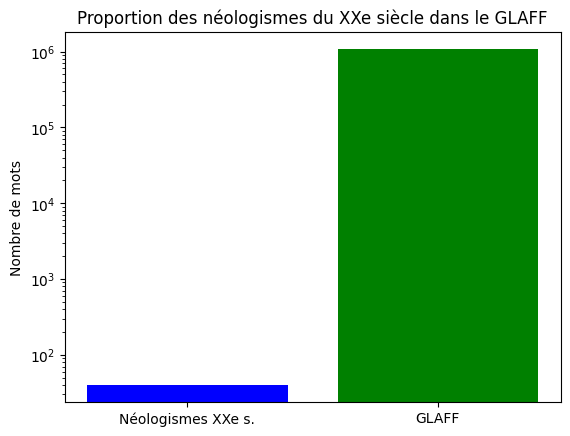

In [31]:


voc_total_glaff= len(dico_glaff.keys())
#print(len(voc_total_glaff)) 1082688

liste_neo= list(set_neo_02)
long_neo= len(liste_neo)
#print(long_neo) 40

categories = ["Néologismes XXe s.", "GLAFF"]
valeurs = [40, 1082688]


plt.bar(categories, valeurs, color=["blue", "green"])


plt.ylabel("Nombre de mots")
plt.title("Proportion des néologismes du XXe siècle dans le GLAFF")


plt.yscale("log")  # Échelle logarithmique pour mieux voir la différence
plt.savefig("pie_chart_glaff.png")
plt.show()


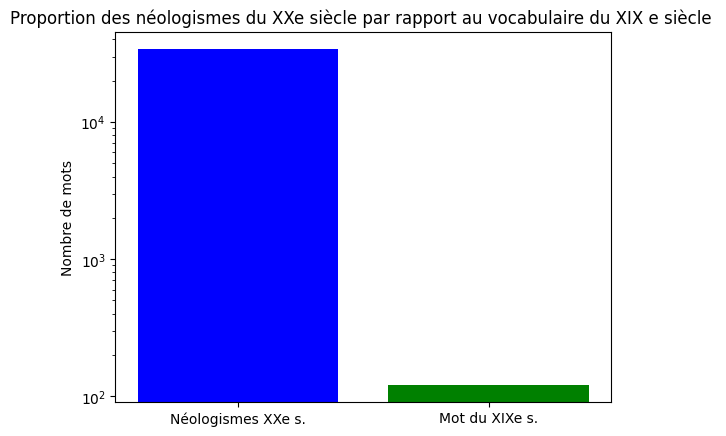

In [36]:
mot_19= len(set_mots_T1) #121
neo_20= len(set_neo_01) #34079

categories = ["Néologismes XXe s.", "Mot du XIXe s."]
valeurs1 = [34079, 121]


plt.bar(categories, valeurs1, color=["blue", "green"])


plt.ylabel("Nombre de mots")
plt.title("Proportion des néologismes du XXe siècle par rapport au vocabulaire du XIX e siècle ")


plt.yscale("log")  # Échelle logarithmique pour mieux voir la différence
plt.savefig("pie_chart_XX-XXI.png")
plt.show()


In [47]:
set_20es= set(mots_tok)
set_19es= set(set_mots_T1)
mise_a_jour= update_vocabulaire(set_20es,set_19es)
print(mise_a_jour)

({'famille', 'prince', 'petit-jeannot', 'équitation', 'amour.', 'tania', 'époux.', "d'Adolphe,", 'besoin', 'titre', 'éducation', 'tant', 'ciel', 'entre', 'maintenant', 'sincères.', 'a', 'matin-là', 'était', 'lui,', 'et', 'roman,', 'armes', 'mourir', 'mer', 'rein', 'souvenir', 'il', 'vers', 'destine', 'aventure', 'épousa', 'existence.', 'avait', 'genoux', 'navire', "d'un", 'péristyle', 'horizon', 'bourgeoisement', 'colonnes', 'elle', 'temps', 'un', 'm', 'ce', 'interrogent', 'simple', 'de', 'passer', 'léopold-ferdinand', 'qu', 'édouard', 'ferveur', 'ethel', 'en', 'appuient', 'sur', 'regardent', 'font', 'retourna', 'fournirent', 'soirs', 'comtesse', 'père', 'Dans', 'ses', 'dont', 'partie', 'aurore', 'grande', 'flattant,', 'augustinergasse', 'bohémienne', 'écrit', 'apparaît', 'pauvre', 'construire', 'où', 'dirigés', 'avaient', 'chez', 'avant', 'grandes', 'pour', 'Cela', 'héritier', 'encore', 'la', 'épilogue', 'monde', 'que', 'magnus', 'formidable', 'Ellénore', 'Menneraye,', 'demandant', 'a